# SMALL MDP: Rock Paper  Scissors

In [1]:
import numpy as np

In [2]:
V = {state: 0 for state in ['rock', 'paper', 'scissors']}
threshold = 1e-6
converged = False
iterations = 0

### Value Iteration

In [5]:

while not converged:
    iterations += 1
    max_change = 0
    for state in V:
        old_value = V[state]
        values = []
        for action in ['rock', 'paper', 'scissors']:
            # Calculate expected value for each action
            expected_value = 0
            for opponent_action, probability in [('rock', 1/3), ('paper', 1/3), ('scissors', 1/3)]:
                if action == opponent_action:
                    expected_value += 0
                elif (action == 'rock' and opponent_action == 'scissors') or \
                     (action == 'paper' and opponent_action == 'rock') or \
                     (action == 'scissors' and opponent_action == 'paper'):
                    expected_value += 1
                else:
                    expected_value -= 1
            values.append(expected_value)
        V[state] = max(values)
        max_change = max(max_change, abs(old_value - V[state]))
    if max_change < threshold:
        converged = True

In [6]:
print("Converged after", iterations, "iterations")
print("Optimal Values:", V)

Converged after 1 iterations
Optimal Values: {'rock': 0, 'paper': 0, 'scissors': 0}


### Policy Iteration

In [7]:
V = {state: 0 for state in ['rock', 'paper', 'scissors']}
policy = {state: 'rock' for state in ['rock', 'paper', 'scissors']}
threshold = 1e-6
converged = False
iterations = 0


In [8]:

while not converged:
    iterations += 1
    # Policy Evaluation
    while True:
        max_change = 0
        for state in V:
            old_value = V[state]
            action = policy[state]
            expected_value = 0
            for opponent_action, probability in [('rock', 1/3), ('paper', 1/3), ('scissors', 1/3)]:
                if action == opponent_action:
                    expected_value += 0
                elif (action == 'rock' and opponent_action == 'scissors') or \
                     (action == 'paper' and opponent_action == 'rock') or \
                     (action == 'scissors' and opponent_action == 'paper'):
                    expected_value += 1
                else:
                    expected_value -= 1
            V[state] = expected_value
            max_change = max(max_change, abs(old_value - V[state]))
        if max_change < threshold:
            break
    # Policy Improvement
    policy_stable = True
    for state in policy:
        old_action = policy[state]
        values = []
        for action in ['rock', 'paper', 'scissors']:
            expected_value = V[state]
            values.append((expected_value, action))
        best_action = max(values)[1]
        policy[state] = best_action
        if best_action != old_action:
            policy_stable = False
    if policy_stable:
        converged = True


In [9]:

print("Converged after", iterations, "iterations")
print("Optimal Policy:", policy)


Converged after 2 iterations
Optimal Policy: {'rock': 'scissors', 'paper': 'scissors', 'scissors': 'scissors'}


In [10]:
import numpy as np

# Define constants for the grid world
NUM_ROWS = 3
NUM_COLS = 4
NUM_ACTIONS = 4  # Up, Down, Left, Right
NUM_STATES = NUM_ROWS * NUM_COLS

# Define rewards for each state
rewards = np.array([
    [-0.04, -0.04, -0.04, +1],
    [-0.04, None, -0.04, -1],
    [-0.04, -0.04, -0.04, -0.04]
])

# Define actions (Up, Down, Left, Right)
actions = {
    0: (-1, 0),  # Up
    1: (1, 0),   # Down
    2: (0, -1),  # Left
    3: (0, 1)    # Right
}

# Define the policy (arbitrarily chosen initially)
policy = np.random.randint(0, NUM_ACTIONS, size=(NUM_ROWS, NUM_COLS))

# Define discount factor
discount_factor = 0.99

# Define convergence threshold
threshold = 1e-6

# Policy iteration
while True:
    # Policy evaluation
    while True:
        delta = 0
        for i in range(NUM_ROWS):
            for j in range(NUM_COLS):
                if rewards[i, j] is None:
                    continue  # Skip obstacle states
                old_value = rewards[i, j]
                action = actions[policy[i, j]]
                new_i, new_j = i + action[0], j + action[1]
                new_i = max(0, min(new_i, NUM_ROWS - 1))  # Ensure within grid bounds
                new_j = max(0, min(new_j, NUM_COLS - 1))
                rewards[i, j] = rewards[i, j] + discount_factor * rewards[new_i, new_j]
                delta = max(delta, abs(old_value - rewards[i, j]))
        if delta < threshold:
            break

    # Policy improvement
    policy_stable = True
    for i in range(NUM_ROWS):
        for j in range(NUM_COLS):
            if rewards[i, j] is None:
                continue  # Skip obstacle states
            old_action = policy[i, j]
            best_action = None
            best_value = float('-inf')
            for a in range(NUM_ACTIONS):
                action = actions[a]
                new_i, new_j = i + action[0], j + action[1]
                new_i = max(0, min(new_i, NUM_ROWS - 1))  # Ensure within grid bounds
                new_j = max(0, min(new_j, NUM_COLS - 1))
                if rewards[new_i, new_j] > best_value:
                    best_value = rewards[new_i, new_j]
                    best_action = a
            policy[i, j] = best_action
            if old_action != best_action:
                policy_stable = False
    if policy_stable:
        break

# Print the final policy
print("Final Policy:")
print(policy)



TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [11]:
import numpy as np

# Define constants
NUM_STATES = 3  # Opponent's last move: Rock, Paper, Scissors
NUM_ACTIONS = 3  # Your move: Rock, Paper, Scissors
pr_eval = True
pr_iter =True
# Define rewards (Win: +1, Lose: -1, Draw: 0)
rewards = np.array([
    [0, -1, 1],  # Opponent's last move was Rock
    [1, 0, -1],  # Opponent's last move was Paper
    [-1, 1, 0]   # Opponent's last move was Scissors
])

# Define the policy (arbitrarily chosen initially)
policy = np.random.randint(0, NUM_ACTIONS, size=NUM_STATES)

# Define discount factor
discount_factor = 1.0  # No discounting for this game

# Define convergence threshold
threshold = 1e-6

# Maximum number of iterations
max_iterations = 1000

# Policy iteration
total_iter = []
Values = []
for iteration in range(max_iterations):
    # Policy evaluation
    delta = 0
    for state in range(NUM_STATES):
        old_value = rewards[state, policy[state]]
        reward = rewards[state, policy[state]]
        delta = max(delta, abs(old_value - reward))

    if delta < threshold and pr_eval:
        #print(f"Policy evaluation converged after {iteration + 1} iterations.")
        pr_eval = False

    # Policy improvement
    policy_stable = True
    for state in range(NUM_STATES):
        old_action = policy[state]
        best_action = np.argmax(rewards[state])
        policy[state] = best_action
        if old_action != best_action:
            policy_stable = False
    total_iter.append(iteration)
    Values.append(rewards[state, policy[state]])
    # Check convergence
    if policy_stable and pr_iter:
        print(f"Policy iteration converged after {iteration + 1} iterations.")
        pr_iter = False
    elif iteration == max_iterations - 1:
        print("Maximum iterations reached without convergence.")
    if delta < threshold and policy_stable:
        break
# Print the final policy
actions_mapping = {0: 'R', 1: 'P', 2: 'S'}
final_policy = [actions_mapping[action] for action in policy]
print("Final Policy:")
policy_iteration_policy = final_policy
print(final_policy)


Policy iteration converged after 2 iterations.
Final Policy:
['S', 'R', 'P']


In [12]:
import numpy as np

# Define constants
NUM_STATES = 3  # Opponent's last move: Rock, Paper, Scissors
NUM_ACTIONS = 3  # Your move: Rock, Paper, Scissors

# Define rewards (Win: +1, Lose: -1, Draw: 0)
rewards = np.array([
    [0, -1, 1],  # Opponent's last move was Rock
    [1, 0, -1],  # Opponent's last move was Paper
    [-1, 1, 0]   # Opponent's last move was Scissors
])

# Define discount factor
discount_factor = 1.0  # No discounting for this game

# Initialize value function
V = np.zeros(NUM_STATES)

# Convergence threshold
threshold = 1e-6

# Maximum number of iterations
max_iterations = 1000
delta_over_iter=[]
iters= []
# Value iteration
for iteration in range(max_iterations):
    delta = 0
    for state in range(NUM_STATES):
        old_value = V[state]

        # Compute the value for each action
        action_values = [rewards[state, next_state] + discount_factor * V[next_state] for next_state in range(NUM_STATES)]

        # Update the value function with the maximum value
        V[state] = max(action_values)

        delta = max(delta, abs(old_value - V[state]))
    delta_over_iter.append(delta)
    iters.append(iteration)
    if delta < threshold:
        print(f"Value iteration converged after {iteration + 1} iterations.")
        break

# Derive optimal policy from the optimal value function
policy = np.zeros(NUM_STATES, dtype=int)
for state in range(NUM_STATES):
    action_values = [rewards[state, next_state] + discount_factor * V[next_state] for next_state in range(NUM_STATES)]
    policy[state] = np.argmax(action_values)

# Print the optimal value function and policy
print("Optimal Value Function:")
print(V)
print("Optimal Policy:")
actions_mapping = {0: 'R', 1: 'P', 2: 'S'}
final_policy = [actions_mapping[action] for action in policy]
value_iteration_policy = final_policy
print(final_policy)


Optimal Value Function:
[2998. 2999. 3000.]
Optimal Policy:
['S', 'R', 'P']


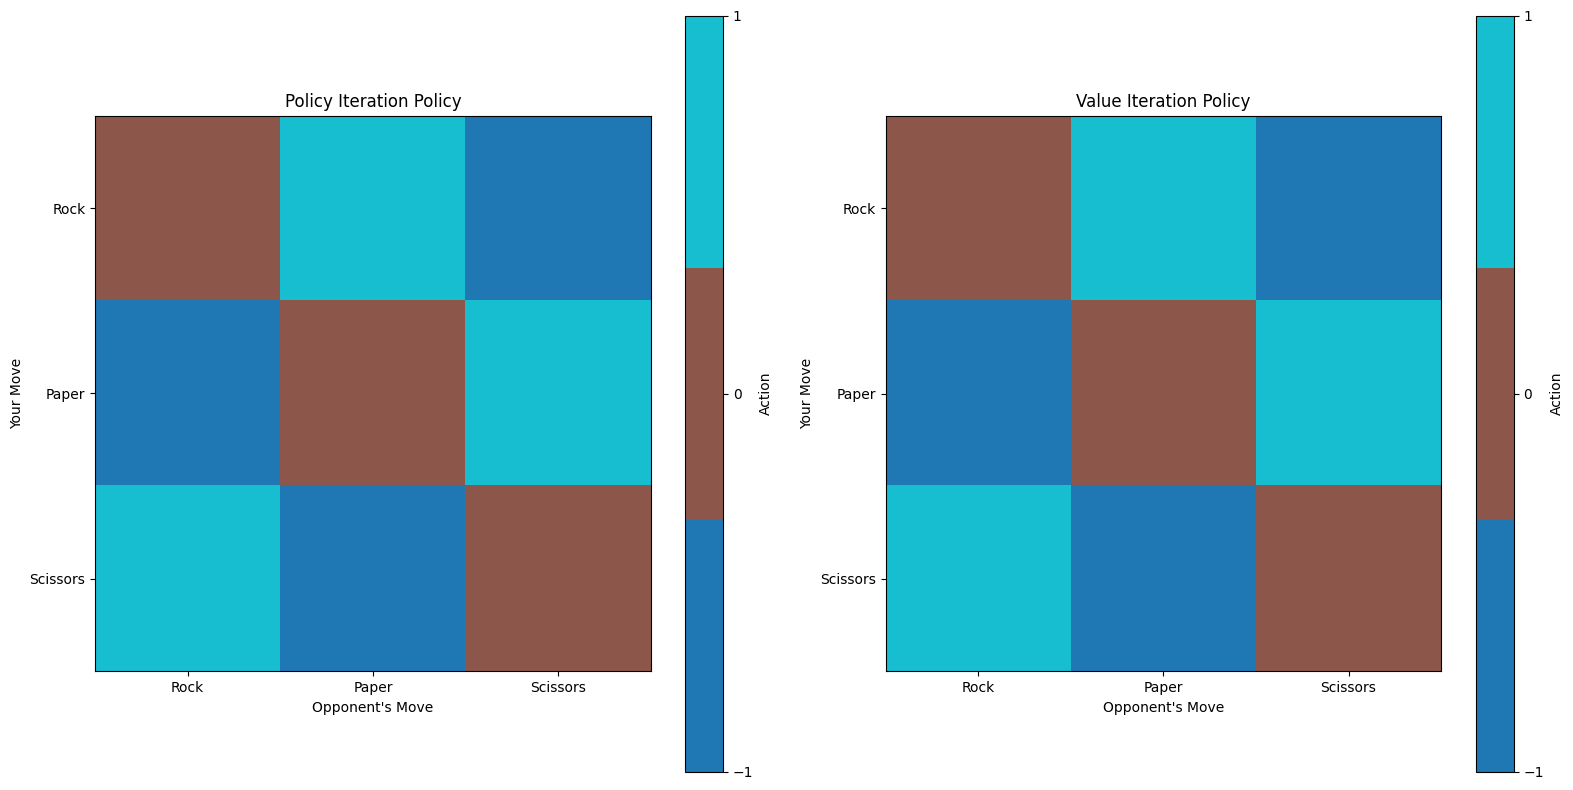

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Sample optimal policies from Policy Iteration and Value Iteration
# Replace these with your actual optimal policies
policy_iteration_policy = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])
value_iteration_policy = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])

# Determine xticks and yticks placement based on the shape of the policy_iteration_policy array
xticks_placement = np.linspace(0, policy_iteration_policy.shape[1] - 1, policy_iteration_policy.shape[1], dtype=int)
yticks_placement = np.linspace(0, policy_iteration_policy.shape[0] - 1, policy_iteration_policy.shape[0], dtype=int)

# Create a color map for policies
cmap = plt.get_cmap('tab10', 3)  # Assuming 3 actions (0, 1, 2)

# Comparison Plot
plt.figure(figsize=(16, 8))

# Policy Iteration
plt.subplot(1, 2, 1)
plt.imshow(policy_iteration_policy, cmap=cmap, interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar(ticks=[-1, 0, 1], label='Action')
plt.title('Policy Iteration Policy')
plt.xlabel('Opponent\'s Move')
plt.ylabel('Your Move')
plt.xticks(xticks_placement, labels=['Rock', 'Paper', 'Scissors'])
plt.yticks(yticks_placement, labels=['Rock', 'Paper', 'Scissors'])
plt.grid(False)

# Value Iteration
plt.subplot(1, 2, 2)
plt.imshow(value_iteration_policy, cmap=cmap, interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar(ticks=[-1, 0, 1], label='Action')
plt.title('Value Iteration Policy')
plt.xlabel('Opponent\'s Move')
plt.ylabel('Your Move')
plt.xticks(xticks_placement, labels=['Rock', 'Paper', 'Scissors'])
plt.yticks(yticks_placement, labels=['Rock', 'Paper', 'Scissors'])
plt.grid(False)

plt.tight_layout()
plt.show()


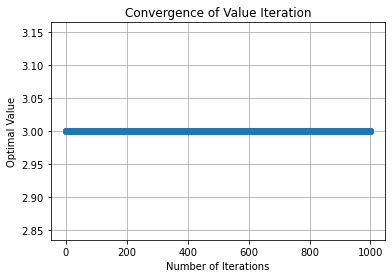

In [ ]:

plt.plot( iters,delta_over_iter, marker='o')
plt.title('Convergence of Value Iteration')
plt.xlabel('Number of Iterations')
plt.ylabel('Optimal Value')
plt.grid(True)
plt.show()


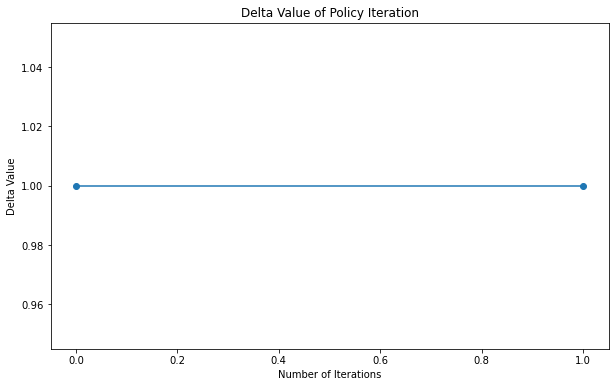

In [ ]:



# Convergence Plot for Value Iteration

plt.figure(figsize=(10, 6))
plt.plot(total_iter, Values, marker='o')
plt.title('Delta Value of Policy Iteration')
plt.xlabel('Number of Iterations')
plt.ylabel('Delta Value')
plt.show()


In [ ]:
! pip install numpy>=1.20

In [15]:
!pip install stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.1/182.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 12.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

In [20]:
import gym
from gym import spaces
import numpy as np
from stable_baselines3 import PPO

class RockPaperScissorsEnv(gym.Env):
    def __init__(self):
        super(RockPaperScissorsEnv, self).__init__()
        self.action_space = spaces.Discrete(3)  # rock, paper, scissors
        self.observation_space = spaces.Discrete(3)  # rock, paper, scissors
        self.state = None

    def reset(self):
        self.state = np.random.randint(3)
        return self.state

    def step(self, action):
        # 0: rock, 1: paper, 2: scissors
        if (action - self.state) % 3 == 1:
            reward = 1
        elif (action - self.state) % 3 == 2:
            reward = -1
        else:
            reward = 0

        self.state = np.random.randint(3)
        done = False
        info = {}

        return self.state, reward, done, info

# Create environment
env = RockPaperScissorsEnv()

# Train using PPO algorithm
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Test the trained model
obs = env.reset()
for _ in range(10):
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(action)
    print(f"Action: {action}, Reward: {reward}, Done: {done}, Info: {info}")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 354  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 319         |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013917791 |
|    clip_fraction        | 0.35        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.00396    |
|    learning_rate        | 0.0003      |
|    loss                 | 2.94        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0475     |
|    value_loss           | 4.47        |
-----------------------------------------
----------------------------------

In [19]:
!pip install shimmy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
